* **Importing Libraries**

In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix

* **Collecting The Dataset**

In [ ]:
columns = ["State", "Text"]
ds = pd.read_csv("/content/SMSSpamCollection", sep="\t", names=columns)

### Overview on Dataset

In [ ]:
ds.sample(4)

,State,Text
3009,spam,"Loan for any purpose £500 - £75,000. Homeowner..."
4636,ham,How come i din c ü... Yup i cut my hair...
2696,ham,And whenever you and i see we can still hook u...
4350,ham,Ü bot notes oredi... Cos i juz rem i got...


In [ ]:
len(ds)

5572

In [ ]:
ds.shape

(5572, 2)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
ds['State'].value_counts()

,count
State,
ham,4825
spam,747


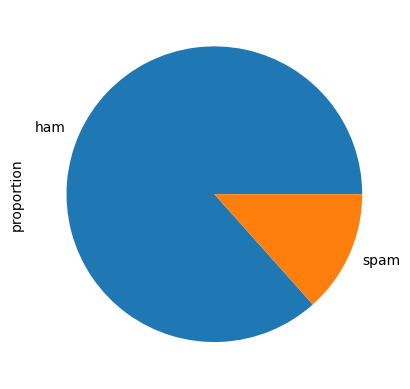

In [ ]:
ds['State'].value_counts(normalize=True).plot.pie()
plt.show()

In [ ]:
ds.isnull().sum()

,0
State,0
Text,0


In [ ]:
df = ds.copy()

### Punctuation

In [ ]:
df['Text'] = df['Text'].str.strip()

df['Text'] = df['Text'].replace(to_replace= r"[\d]+", value=" number ", regex=True)

df['Text'] = df['Text'].replace(to_replace=r"\?", value=" quesionmark ", regex=True)


In [ ]:
# using string library

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def Removing_Punctuation(text):

  new_list = "".join([x for x in text if x not in string.punctuation])

  return new_list


In [ ]:
df['New_Text'] = df['Text'].apply(lambda x: Removing_Punctuation(x.lower()))

In [ ]:
df.sample(10)

,State,Text,New_Text
3570,ham,She's fine. Sends her greetings,shes fine sends her greetings
677,ham,Maybe quesionmark ! Say hi to and find out if...,maybe quesionmark say hi to and find out if ...
2890,ham,My battery is low babe,my battery is low babe
1975,ham,Thats cool. Where should i cum quesionmark On...,thats cool where should i cum quesionmark on ...
2054,ham,Oh... I was thkin of goin yogasana at number ...,oh i was thkin of goin yogasana at number de...
1076,ham,Oi. Ami parchi na re. Kicchu kaaj korte iccha ...,oi ami parchi na re kicchu kaaj korte iccha ko...
283,ham,Ok. I asked for money how far,ok i asked for money how far
4781,ham,Sen told that he is going to join his uncle fi...,sen told that he is going to join his uncle fi...
980,ham,Another month. I need chocolate weed and alcohol.,another month i need chocolate weed and alcohol
2805,ham,Lil fever:) now fine:),lil fever now fine


### Tokenization

In [ ]:
# Option One:

def Tokenize(text):

  token_text = re.split(r"[\W]+",text)

  return token_text


In [ ]:
df["tokenized"] = df['New_Text'].apply(lambda x: Tokenize(x))

In [ ]:
# Option Two:

def Tokenization(text):

  token_text = nltk.word_tokenize(text)

  return token_text


In [ ]:
#df["tokenized"] = df['New_Text'].apply(lambda x: Tokenization(x))

In [ ]:
df.sample(7)

,State,Text,New_Text,tokenized
2262,ham,Did you show him and wot did he say or could u...,did you show him and wot did he say or could u...,"[did, you, show, him, and, wot, did, he, say, ..."
2660,ham,Ok...,ok,[ok]
3312,ham,HI DARLIN HOW WAS WORK DID U GET INTO TROUBLE ...,hi darlin how was work did u get into trouble ...,"[hi, darlin, how, was, work, did, u, get, into..."
2675,ham,I am number ft. We will be a good combination!,i am number ft we will be a good combination,"[i, am, number, ft, we, will, be, a, good, com..."
2778,ham,Kind of. Took it to garage. Centre part of exh...,kind of took it to garage centre part of exhau...,"[kind, of, took, it, to, garage, centre, part,..."
4034,ham,I am taking you for italian food. How about a ...,i am taking you for italian food how about a p...,"[i, am, taking, you, for, italian, food, how, ..."
4488,ham,Miss call miss call khelate kintu opponenter m...,miss call miss call khelate kintu opponenter m...,"[miss, call, miss, call, khelate, kintu, oppon..."


In [ ]:
df.iloc[0,:]

,0
State,ham
Text,"Go until jurong point, crazy.. Available only ..."
New_Text,go until jurong point crazy available only in ...
tokenized,"[go, until, jurong, point, crazy, available, o..."


### Stemming

In [ ]:
stemmer = PorterStemmer()

def Stemmer(text):

  new_text = [stemmer.stem(x) for x in text]

  return new_text

In [ ]:
df["Stemmed"] = df['tokenized'].apply(lambda x: Stemmer(x))

In [ ]:
df.sample(3)

,State,Text,New_Text,tokenized,Stemmed
3283,ham,Hey you around quesionmark I've got enough fo...,hey you around quesionmark ive got enough for...,"[hey, you, around, quesionmark, ive, got, enou...","[hey, you, around, quesionmark, ive, got, enou..."
2194,ham,I called but no one pick up e phone. I ask bot...,i called but no one pick up e phone i ask both...,"[i, called, but, no, one, pick, up, e, phone, ...","[i, call, but, no, one, pick, up, e, phone, i,..."
1335,ham,Oh ! A half hour is much longer in Syria than ...,oh a half hour is much longer in syria than c...,"[oh, a, half, hour, is, much, longer, in, syri...","[oh, a, half, hour, is, much, longer, in, syri..."


### Stop Word

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_eng = set(stopwords.words("english"))

In [ ]:
len(stopwords_eng)

198

In [ ]:
stopwords_eng

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
works_to_keep = {"not", "no","nor"}

stopwords_eng = stopwords_eng - works_to_keep

stopwords_eng = list(stopwords_eng)

In [ ]:
len(stopwords_eng)

195

In [ ]:
stopwords_eng

["you'd",
 'from',
 'shan',
 'hadn',
 'when',
 'what',
 'herself',
 'his',
 "i'm",
 "mustn't",
 'were',
 'more',
 "they'd",
 'ours',
 'who',
 'will',
 'is',
 'yourself',
 'by',
 'only',
 'whom',
 'such',
 'during',
 'it',
 "wasn't",
 'into',
 'after',
 'her',
 "they'll",
 'because',
 'under',
 'myself',
 'to',
 "aren't",
 'so',
 'there',
 "she's",
 'this',
 'in',
 'doing',
 'should',
 'won',
 "won't",
 'couldn',
 "mightn't",
 'on',
 'while',
 "he'd",
 'these',
 "it'll",
 'off',
 'have',
 'did',
 'all',
 'theirs',
 'same',
 'your',
 'ain',
 'm',
 'up',
 'down',
 'with',
 'y',
 're',
 'am',
 "i've",
 'yours',
 'our',
 "we've",
 'me',
 'once',
 'out',
 'if',
 'of',
 'below',
 'above',
 "couldn't",
 "shouldn't",
 "didn't",
 "hasn't",
 'again',
 'be',
 'until',
 "isn't",
 'or',
 "we'd",
 'aren',
 "she'll",
 'too',
 'them',
 'mightn',
 "should've",
 "they're",
 'then',
 'for',
 'as',
 'having',
 "he's",
 'own',
 "wouldn't",
 "you've",
 "it's",
 'o',
 'they',
 'we',
 "he'll",
 'those',
 'furt

In [ ]:
def Stop_Words(text):

  new_text = " ".join([x for x in text if x not in stopwords_eng])

  return new_text

In [ ]:
df["Stopwords"] = df['Stemmed'].apply(lambda x: Stop_Words(x))

In [ ]:
df.sample(3)

,State,Text,New_Text,tokenized,Stemmed,Stopwords
963,ham,"Watching cartoon, listening music &amp; at eve...",watching cartoon listening music amp at eve ha...,"[watching, cartoon, listening, music, amp, at,...","[watch, cartoon, listen, music, amp, at, eve, ...",watch cartoon listen music amp eve go templ am...
3034,ham,"Aight, lemme know what's up",aight lemme know whats up,"[aight, lemme, know, whats, up]","[aight, lemm, know, what, up]",aight lemm know
3092,spam,LORD OF THE RINGS:RETURN OF THE KING in store ...,lord of the ringsreturn of the king in store n...,"[lord, of, the, ringsreturn, of, the, king, in...","[lord, of, the, ringsreturn, of, the, king, in...",lord ringsreturn king store nowrepli lotr numb...


### Vectorization

#### Count (Srarse Matrix)

In [ ]:
vectorize = CountVectorizer()

fitted = vectorize.fit_transform(df['Stopwords'])

In [ ]:
fitted.shape

(5572, 7034)

* Sparse Matrix

In [ ]:
fitted

* Normal Matrix

In [ ]:
fitted_df = pd.DataFrame(data=fitted.toarray(), columns=vectorize.get_feature_names_out())

In [ ]:
fitted_df.head()

,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,abeg,...,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### N-Grams

In [ ]:
n_grams = CountVectorizer(ngram_range=(1,3))

fitted_n_grams = n_grams.fit_transform(df['Stopwords'])

fitted_df1 = pd.DataFrame(data=fitted_n_grams.toarray(), columns=n_grams.get_feature_names_out())

In [ ]:
fitted_df1.head()

,aa,aa exhaust,aa exhaust hang,aah,aah bless,aah bless arm,aah cuddl,aah cuddl would,aah speak,aah speak tomo,...,zyada kisi ko,üll,üll finish,üll finish buy,üll submit,üll submit da,üll take,üll take forev,〨ud,〨ud even
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TF IDF

In [ ]:
tf_idf = TfidfVectorizer(ngram_range=(1,2))

fitted_tf = tf_idf.fit_transform(df['Stopwords'])

fitted_df2 = pd.DataFrame(data=fitted_tf.toarray(), columns=tf_idf.get_feature_names_out())

In [ ]:
fitted_df2.head()

,aa,aa exhaust,aah,aah bless,aah cuddl,aah speak,aaniy,aaniy pudunga,aaooooright,aaooooright work,...,zs,zs subscript,zyada,zyada kisi,üll,üll finish,üll submit,üll take,〨ud,〨ud even
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Engineering

In [ ]:
df.head()

,State,Text,New_Text,tokenized,Stemmed,Stopwords
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, until, jurong, point, crazi, avail, onli,...",go jurong point crazi avail onli bugi n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in number a wkly comp to win FA C...,free entry in number a wkly comp to win fa c...,"[free, entry, in, number, a, wkly, comp, to, w...","[free, entri, in, number, a, wkli, comp, to, w...",free entri number wkli comp win fa cup final t...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, so, earli, hor, u, c, alreadi, t...",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, i, dont, think, he, goe, to, usf, he, li...",nah dont think goe usf live around though


In [ ]:
df1 = df.drop(["New_Text","tokenized","Stemmed"],axis="columns")

In [ ]:
df1.head()

,State,Text,Stopwords
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail onli bugi n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in number a wkly comp to win FA C...,free entri number wkli comp win fa cup final t...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [ ]:
df1.columns = ["State","Text","Cleaned_Text"]

In [ ]:
df1.head()

,State,Text,Cleaned_Text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail onli bugi n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in number a wkly comp to win FA C...,free entri number wkli comp win fa cup final t...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


#### Text Length

In [ ]:
"""
here you count the length of text only without the spaces
"""

df1["length"] = df1['Text'].apply(lambda x: len(x)-x.count(" "))

In [ ]:
df1.head()

,State,Text,Cleaned_Text,length
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail onli bugi n great ...,92
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,24
2,spam,Free entry in number a wkly comp to win FA C...,free entri number wkli comp win fa cup final t...,139
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,49


#### Percentage of Punctuation

In [ ]:
def Count_pct(text):

  count = sum([1 for char in text if char in string.punctuation])
  return round(count/(len(text)-text.count(" ")),3)*100

df1["%punct"] = df1['Text'].apply(lambda x: Count_pct(x),2)

/tmp/ipython-input-688646866.py:6: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df1["%punct"] = df1['Text'].apply(lambda x: Count_pct(x),2)


In [ ]:
df1.sample(4)

,State,Text,Cleaned_Text,length,%punct
1489,ham,Tell them no need to investigate about me anyw...,tell no need investig anywher,43,2.3
5339,ham,You'd like that wouldn't you quesionmark Jerk!,youd like wouldnt quesionmark jerk,40,7.5
3547,ham,SO IS TH GOWER MATE WHICH IS WHERE I AM! quesi...,th gower mate quesionmark r u man quesionmark ...,150,2.7
2351,ham,You will be in the place of that man,place man,28,0.0


#### Pct of Capitals

In [ ]:
def Count_cap(text):

  count = sum([1 for char in text if char.isupper()])
  return round(count/(len(text)-text.count(" ")),3)*100

df1["%capital"] = df1['Text'].apply(lambda x: Count_cap(x),2)

/tmp/ipython-input-150923858.py:6: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df1["%capital"] = df1['Text'].apply(lambda x: Count_cap(x),2)


In [ ]:
df1.sample(7)

,State,Text,Cleaned_Text,length,%punct,%capital
192,ham,I'm sorry. I've joined the league of people th...,im sorri ive join leagu peopl dont keep touch ...,148,5.4,3.4
543,ham,But am going to college pa. What to do. are el...,go colleg pa els ill come self pa,60,6.7,5.0
716,ham,When i have stuff to sell i.ll tell you,stuff sell ill tell,31,3.2,3.2
2791,spam,U’ve Bin Awarded £ number to Play number In...,u bin award number play number instant cash ca...,117,3.4,16.2
2551,ham,Please sen :)my kind advice :-)please come her...,pleas sen kind advic pleas come tri,49,16.3,2.0
4346,ham,Enjoy urself tmr...,enjoy urself tmr,17,17.6,5.9
17,ham,Eh u remember how number spell his name... Y...,eh u rememb number spell hi name ye v naughti ...,68,7.4,4.4


### Scalling

In [ ]:

scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
target = ["length", "%punct", "%capital"]

df1[target] = scaler.fit_transform(df1[target])

In [ ]:
df1.sample(6)

,State,Text,Cleaned_Text,length,%punct,%capital
3724,ham,We left already we at orchard now.,left alreadi orchard,0.035230,0.036,0.036
1852,ham,Dunno da next show aft number is number . T...,dunno da next show aft number number toa payoh...,0.066396,0.039,0.039
3968,spam,YOU HAVE WON! As a valued Vodafone customer ou...,valu vodafon custom comput ha pick win number ...,0.143631,0.028,0.157
4987,ham,That's y u haf number keep me busy...,u haf number keep busi,0.037940,0.133,0.033
3594,ham,"Sorry, I'll call later",sorri ill call later,0.023035,0.105,0.105
3778,spam,"Mila, age number , blonde, new in UK. I look s...",mila age number blond new uk look sex uk guy u...,0.210027,0.076,0.083


### Preparing x & y

In [ ]:
df1.shape

(5572, 6)

In [ ]:
fitted_df2.shape

(5572, 38699)

In [ ]:
x = pd.concat([df1['length'], df1["%capital"],df1["%punct"],fitted_df2],axis=1)
y = df1['State']

In [ ]:
print(x.shape)
print(y.shape)

(5572, 38702)
(5572,)


In [ ]:
x.head()

,length,%capital,%punct,aa,aa exhaust,aah,aah bless,aah cuddl,aah speak,aaniy,...,zs,zs subscript,zyada,zyada kisi,üll,üll finish,üll submit,üll take,〨ud,〨ud even
0,0.121951,0.033,0.098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.029810,0.083,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.185637,0.072,0.043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.050136,0.051,0.154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.063686,0.041,0.041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

,State
0,ham
1,ham
2,spam
3,ham
4,ham


### Building Model

In [ ]:
y = y.map({"ham": 1, "spam": 0}).astype(int)

In [ ]:
y.head()

,State
0,1
1,1
2,0
3,1
4,1


#### Using normal split model

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=42)

In [ ]:
print(f"training:{x_train.shape}, target: {y_train.shape}")
print(f"testing:{x_test.shape}, target: {y_test.shape}")

training:(4179, 38702), target: (4179,)
testing:(1393, 38702), target: (1393,)


In [ ]:
ran_model = RandomForestClassifier(n_estimators=100)

fitting = ran_model.fit(x_train, y_train)

In [ ]:
result = ran_model.score(x_test, y_test)

In [ ]:
result

0.9770279971284996

* **The most important Feaures**

In [ ]:
"""
it's important if you want to reduce the number of feature to specific number
"""

sorted(zip(ran_model.feature_importances_, x_train.columns), reverse=True)[0:10]

[(np.float64(0.048875968968025305), 'number'),
 (np.float64(0.03470427690669888), 'number number'),
 (np.float64(0.025261146455452375), 'call number'),
 (np.float64(0.023959425900728245), 'length'),
 (np.float64(0.017892530969044525), '%capital'),
 (np.float64(0.015374059979636742), 'free'),
 (np.float64(0.013307153102023959), 'txt'),
 (np.float64(0.011296671083669815), 'claim'),
 (np.float64(0.008979726186935164), 'call'),
 (np.float64(0.008245513800271118), 'repli')]

#### Using K fold

In [ ]:
ran_model1 = RandomForestClassifier(n_estimators=100)

kfold = KFold(n_splits=5)

cross = cross_val_score(ran_model1, x, y, cv=kfold, scoring="accuracy")

In [ ]:
cross

array([0.97399103, 0.98475336, 0.97666068, 0.96947935, 0.97845601])

In [ ]:
np.average(cross)

np.float64(0.9766680889776268)

### Model Evaluaiton

* **confusion matrix**

In [ ]:
y_pred = ran_model.predict(x_test)

matrix = confusion_matrix(y_test, y_pred)

Text(58.222222222222214, 0.5, 'actual')

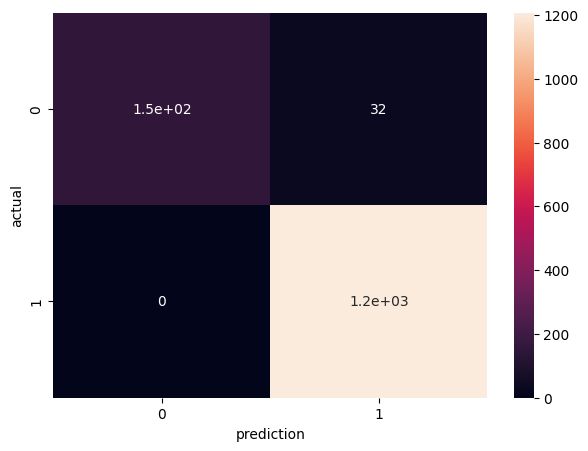

In [ ]:
%matplotlib inline
plt.figure(figsize=(7,5))
sn.heatmap(matrix, annot=True)
plt.xlabel("prediction")
plt.ylabel("actual")